Data set is supposed to be
* 10 sec still
* Pikachu jumps 3-5 times
* 5 sec still
* Pikachu spins 3 times
* (fiddling with it)

Board +x is "down-ish", +y is to the right, +z is out her back (right handed coordinate systyem, whem)

In [88]:
import numpy as np
from scipy.spatial.transform import Rotation

import pandas as pd

In [89]:
%matplotlib inline
from matplotlib import pyplot as plt

In [90]:
ACCEL_SCALING = 2 * 2**-15 # +/-2 G in an i16

In [91]:
data = pd.read_csv('dump_sophietest.csv')
data

,TIME,qw,qx,qy,qz,gyro_x,gyro_y,gyro_z,accel_x,accel_y,accel_z,REMINFIFO
0,0.926910,16162,-703,2588,-65,-15400,-1996,-1432,-122,24,-40,0
1,0.926910,16152,-721,2646,-65,-15536,-2152,-1408,-110,21,-32,0
2,0.926910,16142,-739,2704,-65,-15504,-2356,-1490,-127,18,-33,0
3,0.926910,16131,-760,2762,-64,-15432,-2442,-1372,-150,21,-38,0
4,0.926910,16120,-783,2820,-64,-15412,-2268,-1366,-155,21,-44,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4051,41.361115,665,12321,4234,-9912,-15094,-3388,-3360,-6,52,3,0
4052,41.361115,667,12322,4232,-9912,-15036,-3650,-3628,-4,32,6,0
4053,41.361115,668,12322,4232,-9911,-15018,-4080,-3618,-21,27,-8,0
4054,41.361115,669,12321,4234,-9912,-14948,-3870,-3500,-30,10,-19,0


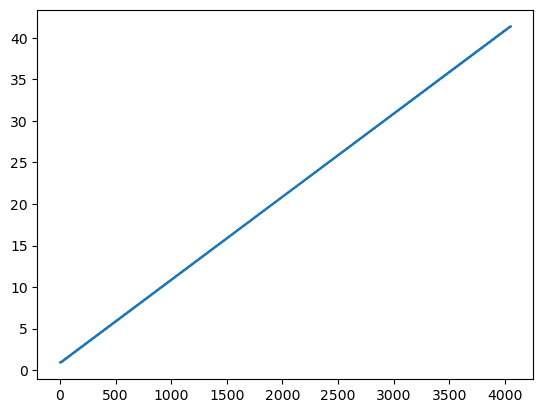

In [92]:
t = np.array(data['TIME'])
plt.plot(t)

Try evenly interpolating the time...

(40.401153564453125, 41.361114501953125)

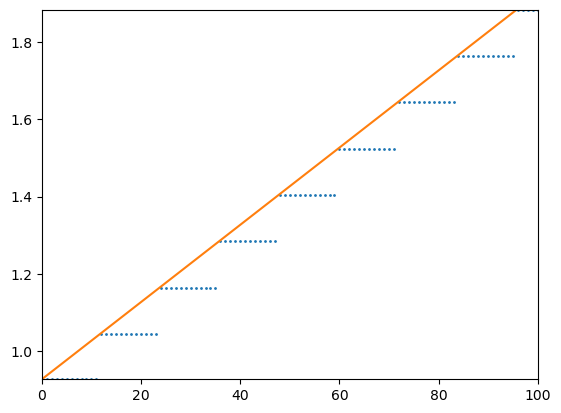

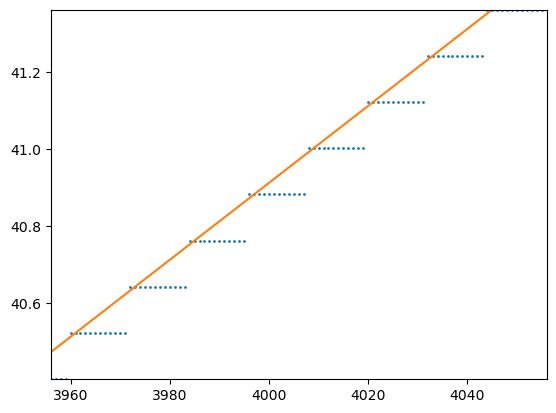

In [93]:
test = np.linspace(t[0], t[-1]+.1, len(t))

plt.figure()
plt.scatter(np.arange(len(t)), t, s=1, c='C0')
plt.plot(np.arange(len(test)), test, c='C1')
plt.xlim(0, 100)
plt.ylim(t[0], t[100])


plt.figure()
plt.scatter(np.arange(len(t)), t, s=1, c='C0')
plt.plot(np.arange(len(test)), test, c='C1')
plt.xlim(len(t)-100, len(t))
plt.ylim(t[-100], t[-1])

In [94]:
ax = ACCEL_SCALING*np.array(data['accel_x'])
ay = ACCEL_SCALING*np.array(data['accel_y'])
az = ACCEL_SCALING*np.array(data['accel_z'])
atot = (ax*ax + ay*ay + az*az)**0.5
atot

array([0.00797204, 0.0071087 , 0.00808388, ..., 0.00214406, 0.00225169,
       0.00236546])

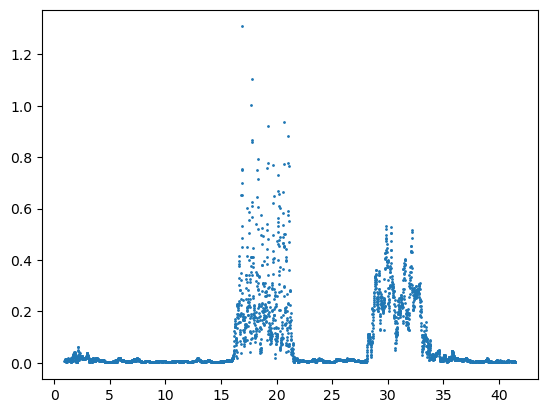

In [95]:
plt.scatter(test, atot, s=1)

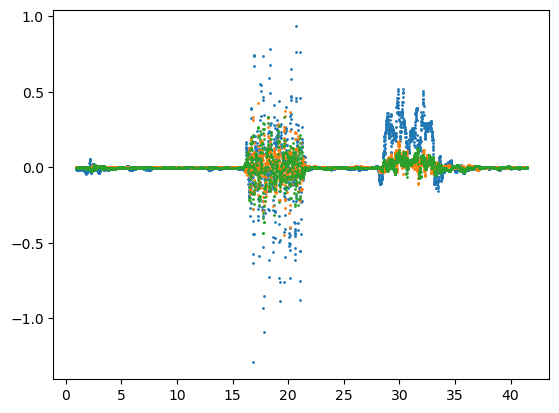

In [96]:
plt.scatter(test, ax, s=1)
plt.scatter(test, ay, s=1)
plt.scatter(test, az, s=1);

(15.0, 22.0)

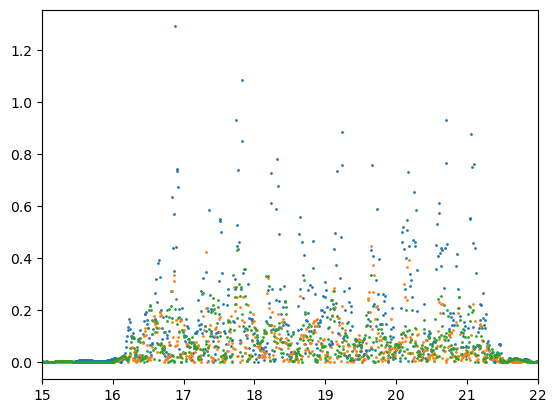

In [97]:
plt.scatter(test, np.abs(ax), s=1)
plt.scatter(test, np.abs(ay), s=1)
plt.scatter(test, np.abs(az), s=1)

plt.xlim(15, 22)

Gyro, just out of curiosity

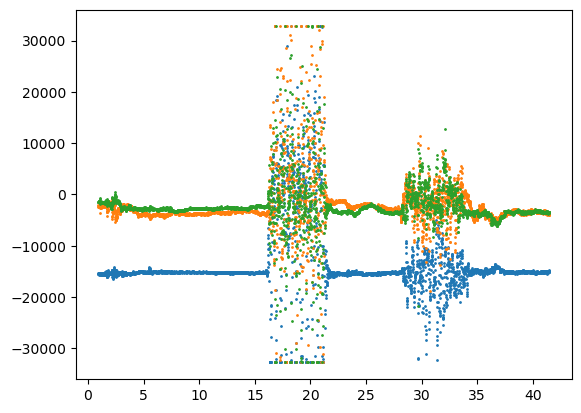

In [98]:
plt.scatter(test, data['gyro_x'], s=1)
plt.scatter(test, data['gyro_y'], s=1)
plt.scatter(test, data['gyro_z'], s=1)

In [107]:
1/np.diff(test)

array([100.03896931, 100.03896931, 100.03896931, ..., 100.03896931,
       100.03896931, 100.03896931])

It's supposed to be 100 Hz so that adds up

In [210]:
q = np.array([data['qw'], data['qx'], data['qy'], data['qz']])*2**-14
np.sum(q*q.astype(float),axis=0)**0.5

array([0.99994592, 0.99995721, 0.99998262, ..., 0.99996311, 0.99998816,
       0.9999921 ])

the quaternions are normalized at 2**&-14? Odd.  But maybe it's the acceperation scaling?

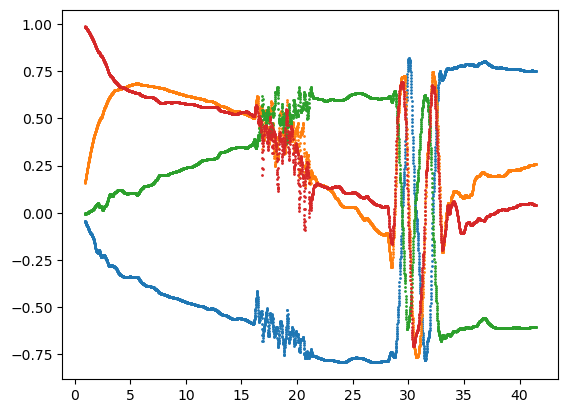

In [100]:
plt.scatter(test, q[1], s=1)
plt.scatter(test, q[2], s=1)
plt.scatter(test, q[3], s=1)
plt.scatter(test, q[0], s=1)

In [101]:
r = Rotation.from_quat(q.T)

# Identify jumping

First try rotating the accel vector using the quarternion to try to figure out jumping up vs other accelerations:

### No transform

pre-jump segment
mean of abs 0.0046153477260044646 0.001000213623046875 0.0018067496163504464
med of abs 0.004180908203125 0.00079345703125 0.00146484375
std 0.0036230399394901434 0.001166128805281951 0.0017745176249920082
jump segment
mean of abs 0.1769421147365196 0.07210689007492202 0.08356887898980615
med of abs 0.11505126953125 0.04620361328125 0.064453125
std 0.2619613102705545 0.10302388709057521 0.11183701519493461
spin segment
mean of abs 0.21403623308454242 0.03752899169921875 0.036551012311662946
med of abs 0.21771240234375 0.02984619140625 0.034088134765625
std 0.14963024308461287 0.039415009474527786 0.03657462964914244


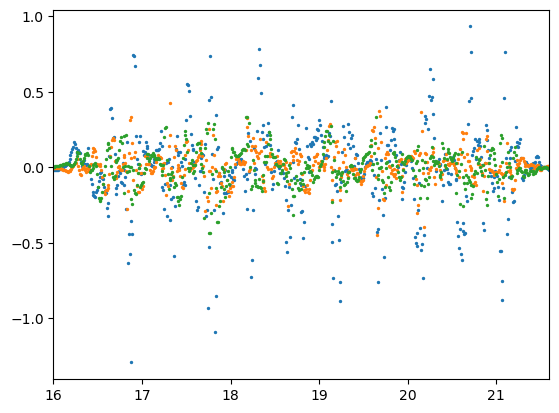

In [103]:
av = np.array([ax, ay, az])
axp, ayp, azp = av
plt.scatter(test, axp, s=2, c='C0')
plt.scatter(test, ayp, s=2, c='C1')
plt.scatter(test, azp, s=2, c='C2')

plt.xlim(16, 21.6)
msk = ((16+16-21.6)<test)&(test <16)
print('pre-jump segment')
print('mean of abs', np.mean(np.abs(axp[msk])), np.mean(np.abs(ayp[msk])), np.mean(np.abs(azp[msk])))
print('med of abs', np.median(np.abs(axp[msk])), np.median(np.abs(ayp[msk])), np.median(np.abs(azp[msk])))
print('std', np.std(axp[msk]), np.std(ayp[msk]), np.std(azp[msk]))

msk = (16<test)&(test <21.6)
print('jump segment')
print('mean of abs', np.mean(np.abs(axp[msk])), np.mean(np.abs(ayp[msk])), np.mean(np.abs(azp[msk])))
print('med of abs', np.median(np.abs(axp[msk])), np.median(np.abs(ayp[msk])), np.median(np.abs(azp[msk])))
print('std', np.std(axp[msk]), np.std(ayp[msk]), np.std(azp[msk]))

msk = (28<test)&(test<(28+(21.6-16)))
print('spin segment')
print('mean of abs', np.mean(np.abs(axp[msk])), np.mean(np.abs(ayp[msk])), np.mean(np.abs(azp[msk])))
print('med of abs', np.median(np.abs(axp[msk])), np.median(np.abs(ayp[msk])), np.median(np.abs(azp[msk])))
print('std', np.std(axp[msk]), np.std(ayp[msk]), np.std(azp[msk]))

### Inverse=True

pre-jump segment
mean of abs 0.0016440891890774263 0.004513776191464554 0.0018315011386849129
med of abs 0.0012079774881463908 0.004056159316000167 0.001618003468979264
std 0.0020717779689736135 0.00337151603514657 0.0015330922597514866
jump segment
mean of abs 0.09377956770964653 0.13846290223870975 0.11833654217232724
med of abs 0.06894821051119163 0.0878653987380337 0.06917064853961304
std 0.12822430815441027 0.20615006544932826 0.18121614147628606
spin segment
mean of abs 0.027986478255281843 0.13737062246243095 0.1431405705808854
med of abs 0.023859342059162403 0.10785974165840811 0.1333529376532283
std 0.03536146052663211 0.17955273046793274 0.1698975041746787


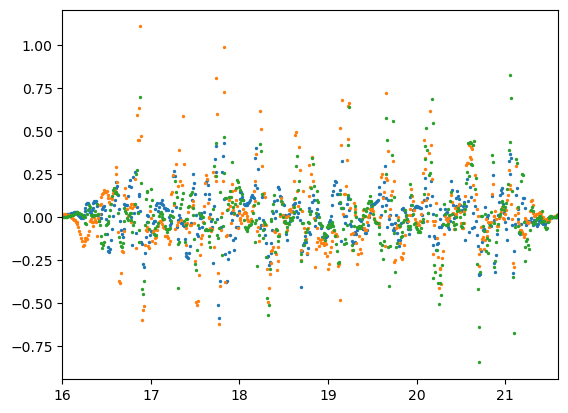

In [104]:
av = np.array([ax, ay, az])
axp, ayp, azp = r.apply(av.T, inverse=True).T
plt.scatter(test, axp, s=2, c='C0')
plt.scatter(test, ayp, s=2, c='C1')
plt.scatter(test, azp, s=2, c='C2')

plt.xlim(16, 21.6)
msk = ((16+16-21.6)<test)&(test <16)
print('pre-jump segment')
print('mean of abs', np.mean(np.abs(axp[msk])), np.mean(np.abs(ayp[msk])), np.mean(np.abs(azp[msk])))
print('med of abs', np.median(np.abs(axp[msk])), np.median(np.abs(ayp[msk])), np.median(np.abs(azp[msk])))
print('std', np.std(axp[msk]), np.std(ayp[msk]), np.std(azp[msk]))

msk = (16<test)&(test <21.6)
print('jump segment')
print('mean of abs', np.mean(np.abs(axp[msk])), np.mean(np.abs(ayp[msk])), np.mean(np.abs(azp[msk])))
print('med of abs', np.median(np.abs(axp[msk])), np.median(np.abs(ayp[msk])), np.median(np.abs(azp[msk])))
print('std', np.std(axp[msk]), np.std(ayp[msk]), np.std(azp[msk]))

msk = (28<test)&(test<(28+(21.6-16)))
print('spin segment')
print('mean of abs', np.mean(np.abs(axp[msk])), np.mean(np.abs(ayp[msk])), np.mean(np.abs(azp[msk])))
print('med of abs', np.median(np.abs(axp[msk])), np.median(np.abs(ayp[msk])), np.median(np.abs(azp[msk])))
print('std', np.std(axp[msk]), np.std(ayp[msk]), np.std(azp[msk]))

### Inverse=False

pre-jump segment
mean of abs 0.0011535708038484618 0.0023575069016866885 0.004358700509470668
med of abs 0.0009029565989251876 0.0020718121607477286 0.0038692044000118004
std 0.0015381066055216819 0.0016861032145107503 0.0035297391690143226
jump segment
mean of abs 0.08086754212451026 0.08828546923951147 0.17163964775575757
med of abs 0.054802693384366954 0.06360848077983008 0.11429201879896118
std 0.11414405809261935 0.11914043160903329 0.2539026748008462
spin segment
mean of abs 0.04333441052112646 0.04666562199211842 0.2081757805166455
med of abs 0.031048892418540586 0.03197203079836424 0.21319538851714187
std 0.051501196985744124 0.05881838862624731 0.14629063333567177


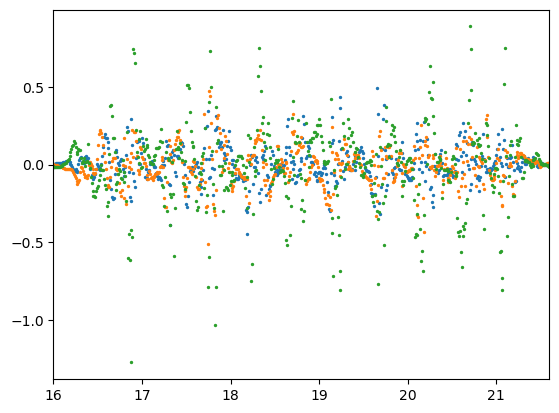

In [105]:
av = np.array([ax, ay, az])
axp, ayp, azp = r.apply(av.T, inverse=False).T
plt.scatter(test, axp, s=2, c='C0')
plt.scatter(test, ayp, s=2, c='C1')
plt.scatter(test, azp, s=2, c='C2')

plt.xlim(16, 21.6)
msk = ((16+16-21.6)<test)&(test <16)
print('pre-jump segment')
print('mean of abs', np.mean(np.abs(axp[msk])), np.mean(np.abs(ayp[msk])), np.mean(np.abs(azp[msk])))
print('med of abs', np.median(np.abs(axp[msk])), np.median(np.abs(ayp[msk])), np.median(np.abs(azp[msk])))
print('std', np.std(axp[msk]), np.std(ayp[msk]), np.std(azp[msk]))

msk = (16<test)&(test <21.6)
print('jump segment')
print('mean of abs', np.mean(np.abs(axp[msk])), np.mean(np.abs(ayp[msk])), np.mean(np.abs(azp[msk])))
print('med of abs', np.median(np.abs(axp[msk])), np.median(np.abs(ayp[msk])), np.median(np.abs(azp[msk])))
print('std', np.std(axp[msk]), np.std(ayp[msk]), np.std(azp[msk]))

msk = (28<test)&(test<(28+(21.6-16)))
print('spin segment')
print('mean of abs', np.mean(np.abs(axp[msk])), np.mean(np.abs(ayp[msk])), np.mean(np.abs(azp[msk])))
print('med of abs', np.median(np.abs(axp[msk])), np.median(np.abs(ayp[msk])), np.median(np.abs(azp[msk])))
print('std', np.std(axp[msk]), np.std(ayp[msk]), np.std(azp[msk]))

Suggests that a running std window on the de-rotated z or raw x will do the job, although possibly mean of abs is sufficient

# Identify spinning

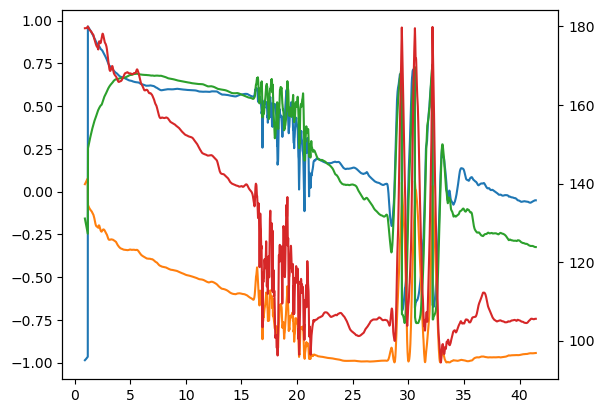

In [22]:
v = r.as_rotvec(degrees=True)
ang = np.linalg.norm(v, axis=1)
n = v.T/ang
nx, ny, nz = n

plt.figure()

plt.plot(test, nx)
plt.plot(test, ny)
plt.plot(test, nz)

plt.twinx()
plt.plot(test, ang, c='C3')

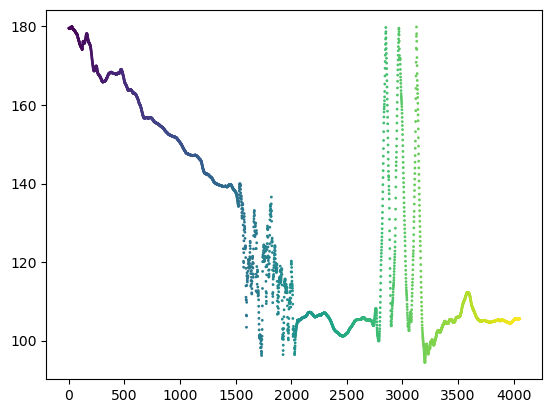

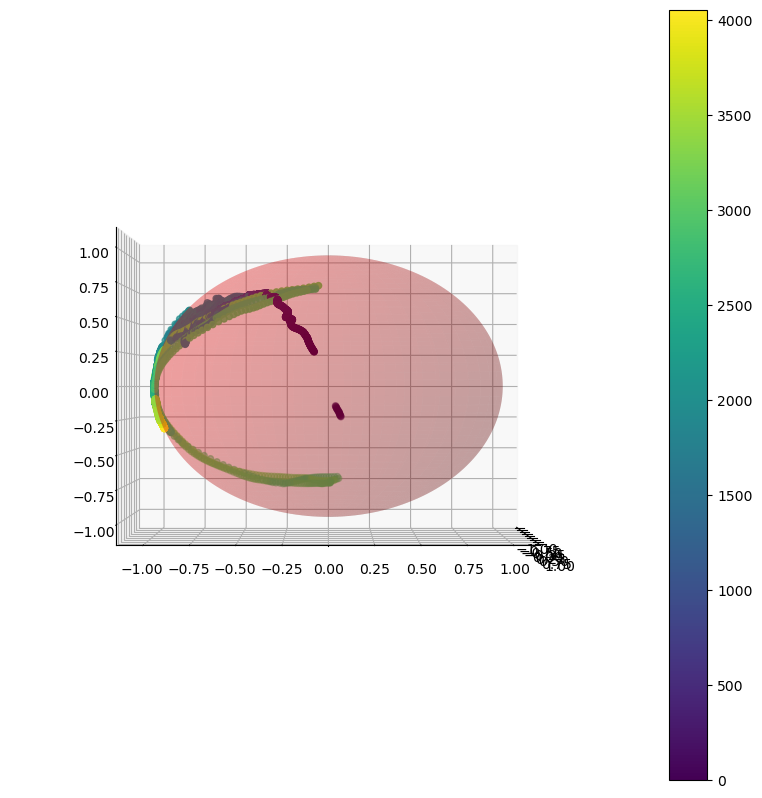

In [85]:
plt.scatter(np.arange(len(ang)), ang, c=np.arange(len(ang)), s=1)


fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')

# sphere
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)
x = 1 * np.outer(np.cos(u), np.sin(v))
y = 1 * np.outer(np.sin(u), np.sin(v))
z = 1 * np.outer(np.ones(np.size(u)), np.cos(v))

# Plot the surface
ax.plot_surface(x, y, z, color='r', alpha=.2)

m = ax.scatter(nx, ny, nz, c=np.arange(len(nx)))
fig.colorbar(m)
ax.azim =  0
ax.elev = 0

Need to work out how the coordinate system is rotated w.r.t. the *original* z-axis?

$ \tan(\theta)= y/x, \theta = \arctan2(y, x)$

So need to rotate the z-axis into the rotated space, compute the above

In [231]:
import sympy
from sympy import symbols, Quaternion
x,y,z,w,qx,qy,qz,qw = symbols('x,y,z,w,q_x,q_y,q_z,q_w')


w*(q_w**2 + q_x**2 + q_y**2 + q_z**2) + (q_w**2*x + 2*q_w*q_y*z - 2*q_w*q_z*y + q_x**2*x + 2*q_x*q_y*y + 2*q_x*q_z*z - q_y**2*x - q_z**2*x)*i + (q_w**2*y - 2*q_w*q_x*z + 2*q_w*q_z*x - q_x**2*y + 2*q_x*q_y*x + q_y**2*y + 2*q_y*q_z*z - q_z**2*y)*j + (q_w**2*z + 2*q_w*q_x*y - 2*q_w*q_y*x - q_x**2*z + 2*q_x*q_z*x - q_y**2*z + 2*q_y*q_z*y + q_z**2*z)*k

### active

In [251]:
qs = Quaternion(qw,qx,qy,qz) 
p = Quaternion(w, x, y, z)

r = (qs.conjugate()*p*qs).simplify()
rz = r.subs({w:0, x:0, y:0, z:1})
rz.c/rz.b

(2*q_w*q_x + 2*q_y*q_z)/(-2*q_w*q_y + 2*q_x*q_z)

(-15.0, 15.0)

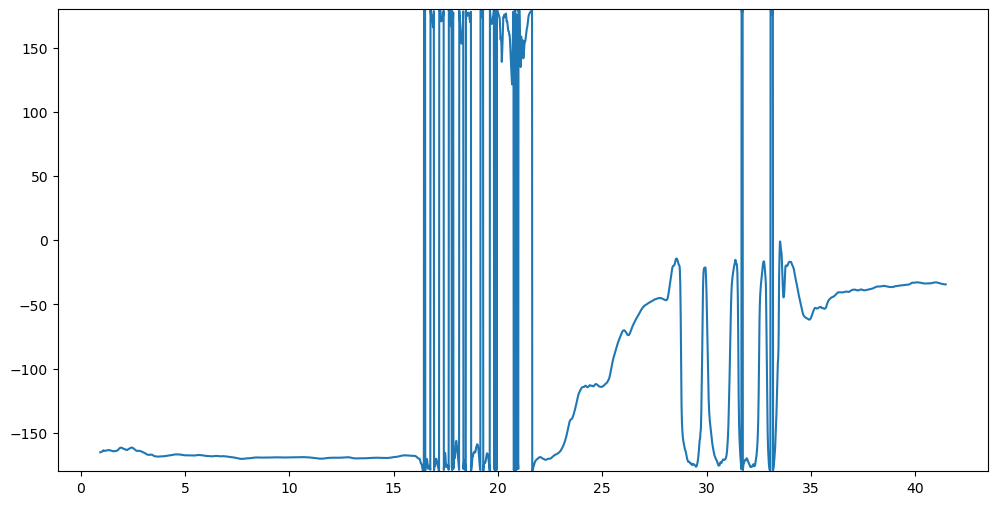

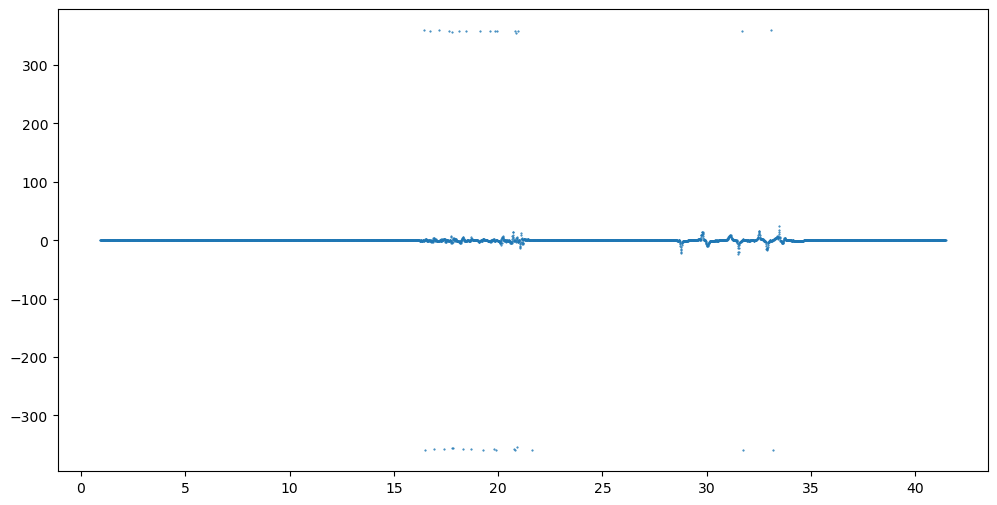

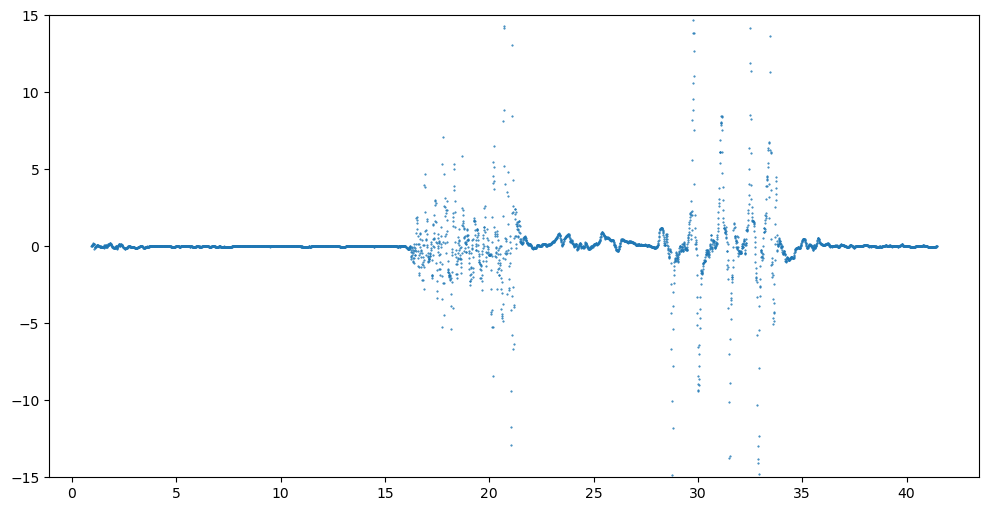

In [252]:
num = 2*(q[0]*q[1] + q[2]*q[3])
den = 2*(-q[0]*q[2] + q[1]*q[2])

ang = np.arctan2(num, den)
dang = np.degrees(ang)

plt.figure(figsize=(12, 6))
plt.plot(test, dang)
plt.ylim(-180, 180)

plt.figure(figsize=(12, 6))
plt.plot(test[:-1], np.diff(dang), '.', ms=1)

plt.figure(figsize=(12, 6))
plt.plot(test[:-1], np.diff(dang), '.', ms=1)
plt.ylim(-15,15)

### passive

In [253]:
qs = Quaternion(qw,qx,qy,qz) 
p = Quaternion(w, x, y, z)

r = (qs*p*qs.conjugate()).simplify()
rz = r.subs({w:0, x:0, y:0, z:1})
rz.c/rz.b

(-2*q_w*q_x + 2*q_y*q_z)/(2*q_w*q_y + 2*q_x*q_z)

(-15.0, 15.0)

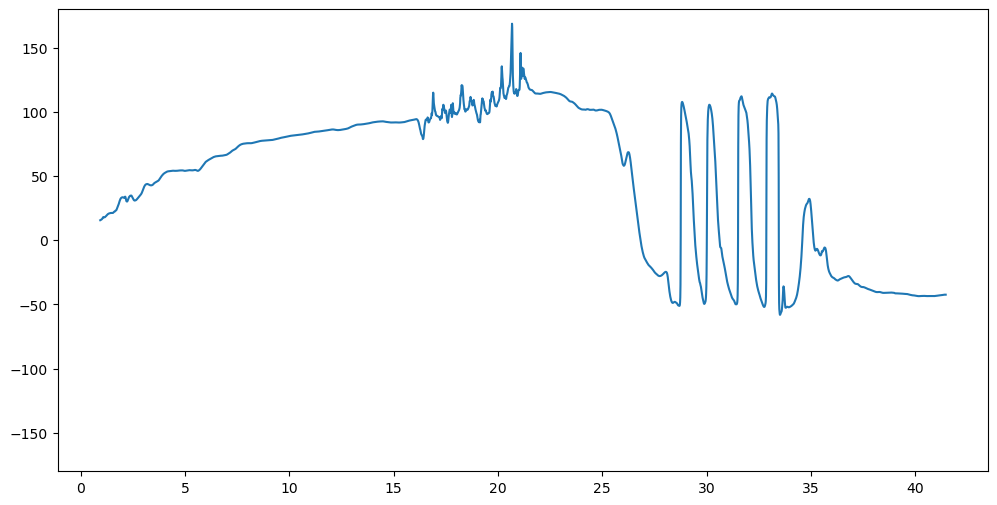

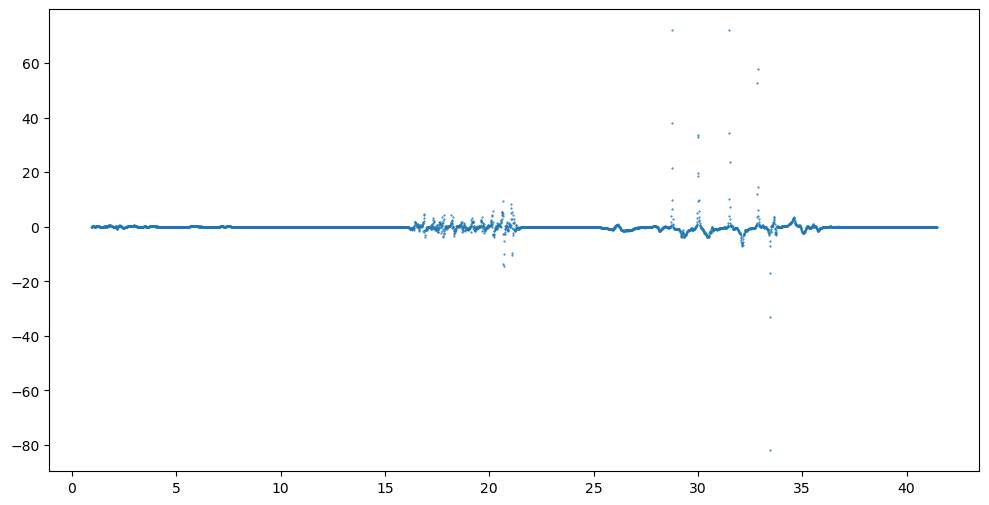

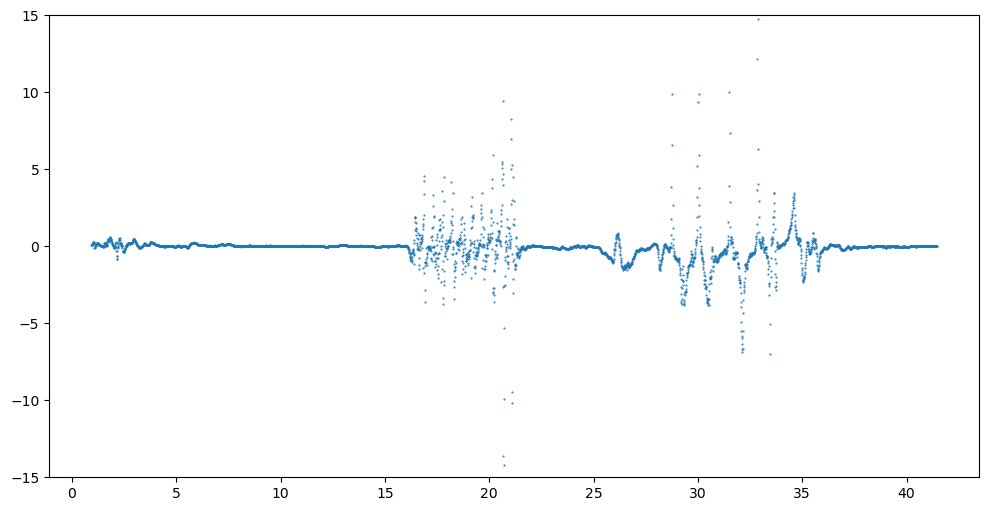

In [254]:
num = 2*(-q[0]*q[1] + q[2]*q[3])
den = 2*(q[0]*q[2] + q[1]*q[2])

ang = np.arctan2(num, den)
dang = np.degrees(ang)

plt.figure(figsize=(12, 6))
plt.plot(test, dang)
plt.ylim(-180, 180)

plt.figure(figsize=(12, 6))
plt.plot(test[:-1], np.diff(dang), '.', ms=1)

plt.figure(figsize=(12, 6))
plt.plot(test[:-1], np.diff(dang), '.', ms=1)
plt.ylim(-15,15)

Maybe if the average of the last 3 of the passive are above some threshold?

(Probably works better if the spin and jump cannot be combined?)